### Задание к модулю PYTHON-13. Визуализация данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
churn_data = pd.read_csv('data/churn.csv')
display(churn_data.head())
churn_data.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


##### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

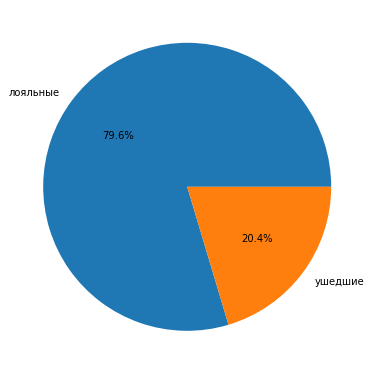

In [2]:
# Построим круговую диаграмму, чтобы отобразить соотношение ушедших и лояльных клиентов.
# Для построения круговых диаграмм в Matplotlib используется метод pie().
# Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной таблицы. 
# Будем отображать доли в процентах и округлять их до одного знака после запятой.

member_combinations = churn_data['Exited'].value_counts()
#print (member_combinations)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    member_combinations,
    labels=['лояльные', 'ушедшие'],
    autopct='%.1f%%'
);

In [3]:

# Построим круговую диаграмму, чтобы отобразить соотношение ушедших и лояльных клиентов.
import plotly.express as px
member_combinations = churn_data['Exited'].value_counts()
#fig = px.pie(member_combinations, values=member_combinations, names=member_combinations.index)
fig = px.pie(member_combinations, values=member_combinations, names=['лояльные', 'ушедшие'])
fig.show()

##### Соотношение ушедших и лояльных клиентов следующее: 79.6% - лояльных, 20.4% - ушедших

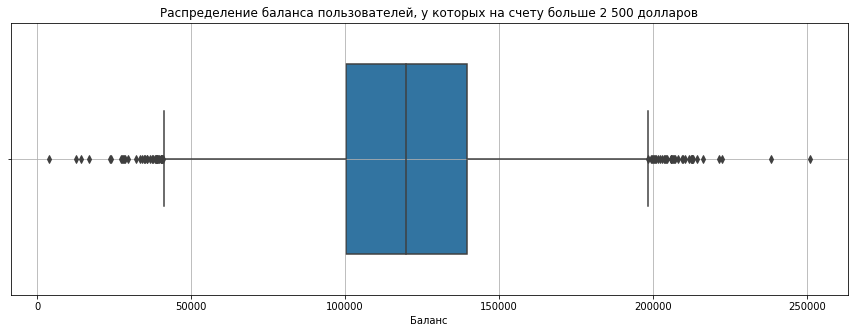

In [4]:
# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
# Опишите распределение и сделайте выводы.

fig = plt.figure(figsize=(15, 5))
boxplot = sns.boxplot(
    data=churn_data[churn_data['Balance']>2500],
    x='Balance',
    #y='IsActiveMember',
    orient='h',
    width=0.7
)
boxplot.set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов');
#boxplot.set_ylabel('Статус пользователя');
boxplot.set_xlabel('Баланс');
boxplot.grid()


#### Межквартильный размах баланса клиентов банка (у которых баланс более 2500$) лежит в интервале от 100000$ до 140000$, а медиана в районе 120000$

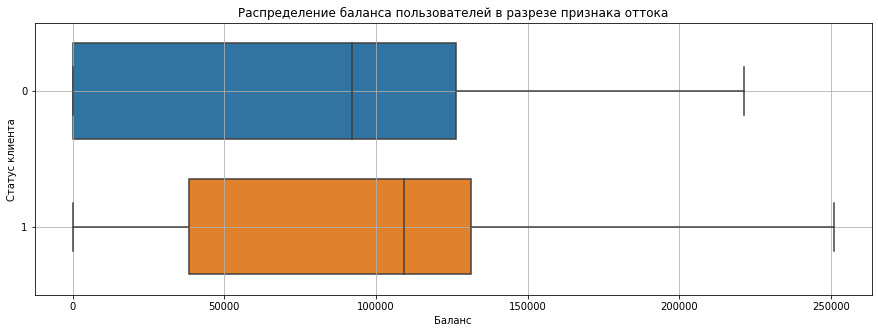

In [5]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

fig = plt.figure(figsize=(15, 5))
boxplot = sns.boxplot(
    #data=churn_data[churn_data['Balance']>2500],
    data=churn_data,
    x='Balance',
    y='Exited',
    orient='h',
    width=0.7
)
boxplot.set_title('Распределение баланса пользователей в разрезе признака оттока');
boxplot.set_ylabel('Статус клиента');
boxplot.set_xlabel('Баланс');
boxplot.grid()

##### 

In [6]:
# проверим полученное распределение на диаграмме с помощью метода describe:
#churn_data['Balance'].describe()
display(churn_data[churn_data['Exited']==1]['Balance'].describe())
display(churn_data[churn_data['Exited']==0]['Balance'].describe())

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: Balance, dtype: float64

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: Balance, dtype: float64

##### Левая граница коробки Q25 для распределения баланса лояльных клиентов равна нулю, что говорит о том, что не менее 25% лояльных клиентов имеют нулевой баланс. При этом медианное значение распределения баланса для ушедших пользователей (около 110000$) выше чем у лояльных. Условный максимум баланса также выше у ушедших пользователей. Таким образом, в среднем у ушедших клиентов баланс счета выше, чем у лояльных. Возможно, ушедших клиентов не устраивала процентная ставка по счету.

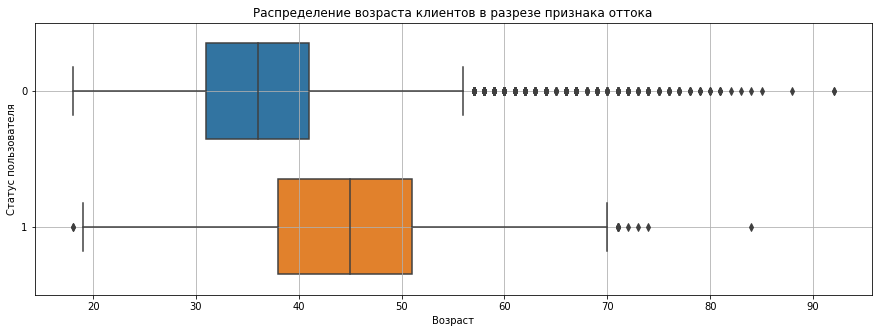

In [7]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?

fig = plt.figure(figsize=(15, 5))
boxplot = sns.boxplot(
    #data=churn_data[churn_data['Balance']>2500],
    data=churn_data,
    x='Age',
    y='Exited',
    orient='h',
    width=0.7
)
boxplot.set_title('Распределение возраста клиентов в разрезе признака оттока');
boxplot.set_ylabel('Статус пользователя');
boxplot.set_xlabel('Возраст');
boxplot.grid()

##### Потенциальных выбросов (правее условного максимума) больше в группе лояльных клиентов. Медианное значение распределения возраста для лояльных клиентов (36 лет) меньше медианного значения возраста ушедших (45 лет). Правая граница коробки Q75  и условный максимум возраста также выше у ушедших клиентов. Можно сделать вывод, что вероятность ухода клиентов возрастает после 40 лет (в этом же районе находится Q75 для лояльных клиентов). Следовательно банку нужно обратить дополнительное внимание на клиентов старше 40 лет.

In [8]:
# churn_data[churn_data['IsActiveMember'==1]]['Age'].describe()
churn_data['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

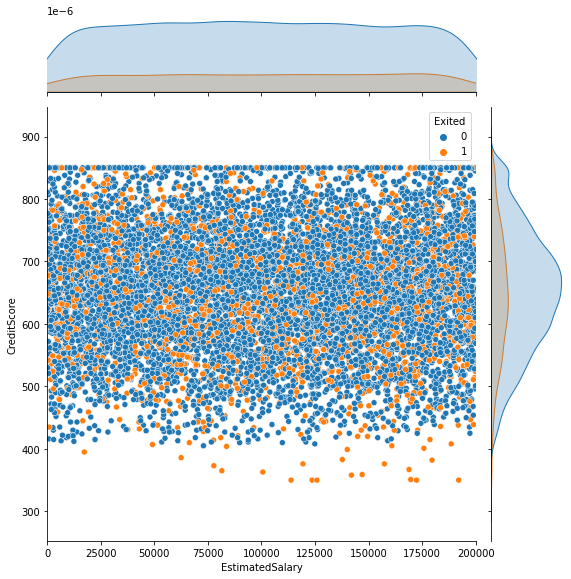

In [9]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.


jointplot = sns.jointplot(
    data=churn_data, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Exited',
    xlim = (0, 200000),
    #ylim = (0, 0.1),
    height=8,
)

##### На графике jointplot видим, что явная связь между кредитным рейтингом клиента и его предполагаемой зарплатой отсутствует.

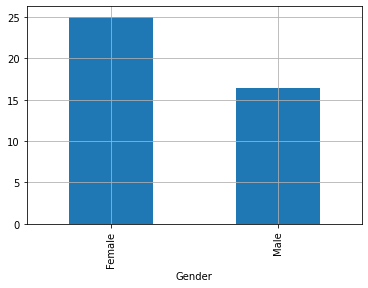

In [35]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.





gender_exited = churn_data.groupby(['Gender'])['Exited'].mean()*100
gender_exited.plot(
    kind='bar',
    grid=True,
    figsize=(6, 4)
);


In [11]:
df = px.data.tips()
fig = px.histogram(churn_data, x="Gender", y="Exited", color="Gender")
fig.show()

##### Чаще уходят женщины (25%)

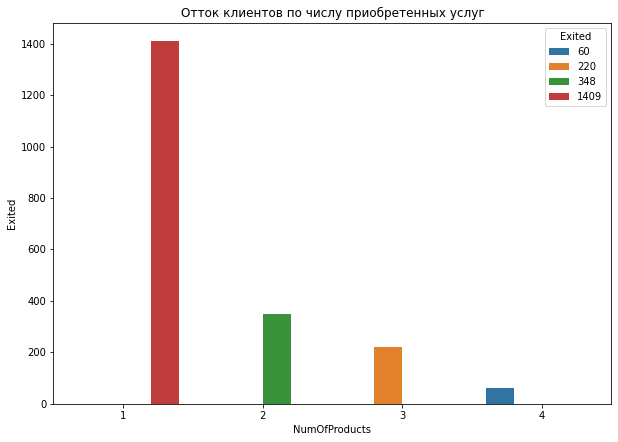

In [25]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.
fig = plt.figure(figsize=(10, 7))
bar_data = churn_data.groupby(
    by='NumOfProducts',
    as_index=False
)['Exited'].sum()
barplot = sns.barplot(
    data=bar_data,
    y='Exited',
    x='NumOfProducts',
    hue='Exited',
)
barplot.set_title('Oтток клиентов по числу приобретенных услуг');

In [13]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(churn_data, x="NumOfProducts", color="Exited")
fig.show()

In [26]:
bar_data = churn_data.groupby(
    by='NumOfProducts',
    as_index=False
)[['Exited']].sum()

#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    y="Exited", #ось x
    x="NumOfProducts", #ось y
    color='NumOfProducts', #расцветка в зависимости от страны
    #text = 'recover_rate', #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Oтток клиентов по числу приобретенных услуг' #заголовок
)

#отображаем его
fig.show()

##### Отток клиентов снижается с ростом количества приобретенных услуг

________________________________________________________________________________________________________________________________________________

##### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [27]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? 
# Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

bar_data = churn_data.groupby(
    by='IsActiveMember',
    as_index=False
)[['Exited']].sum() # т.к. ущедщие активные клиенты при суммировнии не дают прибавки к сумме, то сумма по столбцу будет равна числу ушедших клиентов 

#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    y="Exited", #ось x
    x="IsActiveMember", #ось y
    color='IsActiveMember', #расцветка в зависимости от страны
    #text = 'recover_rate', #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=700, #ширина
    title='Oтток клиентов в зависимости от наличия статуса активного клиента' #заголовок
)

#отображаем его
fig.show()


##### Отток активных клиентов почти в 2 раза (на 45%) ниже чем отток клиентов без данного статуса. Возможно банку нужно определить причины низкой активности клиентов и постараться повысить долю активных клиентов.

___________________________________________________________________________________________________________________________________

##### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [32]:
#подготовка датафрейм (группировка по стране)
map_data = churn_data.groupby(
    by='Geography',
    as_index=False
)[['Exited']].sum()

#строим график
fig = px.choropleth(
    data_frame=map_data, #датафрейм
    locations="Geography", #столбец с локациями
    locationmode = "country names", 
    color="Exited", #от чего зависит цвет
    range_color=[0, 2037], #верхняя граница по общему количеству ушедших клиентов
    title='Global Spread of exited clients', 
    width=800, 
    height=500, 
    color_continuous_scale='Reds' 
)

#отображаем его
fig.show()

##### Судя по картограмме ушедшие клиенты распределены по странам: Германия, Франция, Испания. Вероятно это связано с тем, что банк европейский и базируется в одной из этих стран (Франция?)

_____________________________________________________________________

##### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга. Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей. На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Text(0.5, 1.0, 'Тепловая карта вакцинации')

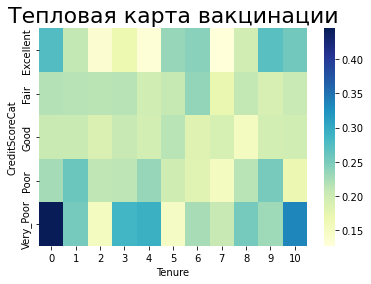

In [46]:
# функция по категорированию кредитного рейтинга:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
# применим функцию get_credit_score_cat к столбцу CreditScore:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
#display(churn_data['CreditScoreCat'].describe())
# построим сводную таблицу:
pivot=churn_data.groupby(['CreditScoreCat', 'Tenure'])['Exited'].mean().unstack()
# построим тепловую карту:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=22)
    
    
    
    

##### Чаще всего уходят клиенты с рейтингои Very_Poor на первом году пользования услугами банка, затем (по величине доли оттока) идут  клиеты с тем же рейтингом, но со сроком пользования услугами банка 10 лет. Похожая тенденция (наибольшая величина доли оттока в на первом году и в конце периода наблюдения - 9-10-лет) наблюдается у клиентов с рейтингом Exellent. 